In [1]:
import csv
import numpy as np


def read_csv_file(csv_file):
    data = []
    is_first_line_consumed = False
    
    with open(csv_file, newline='') as file:
        reader = csv.DictReader(file, delimiter=',')
        
        for row in reader:
            if not is_first_line_consumed:
                is_first_line_consumed = True
                x, y = row
                data.append([x, y])
            
            x, y = row
            data.append([row[x], row[y]])
            
    return np.array(data)

[['0.0' '-6348.053104365714']
 ['1.0' '-6297.826138727561']
 ['2.0' '-6247.921973038114']
 ...
 ['5997.0' '67410.53357700026']
 ['5998.0' '67766.31912616407']
 ['5999.0' '68123.73596576368']]


In [7]:
CSV_FILE_NAME = './testfile.csv'
csv_data = read_csv_file(CSV_FILE_NAME)
print(csv_data)

[['0.0' '-6348.053104365714']
 ['1.0' '-6297.826138727561']
 ['2.0' '-6247.921973038114']
 ...
 ['5997.0' '67410.53357700026']
 ['5998.0' '67766.31912616407']
 ['5999.0' '68123.73596576368']]


In [41]:
X = np.array(csv_data).astype(float)

# y = 2*x0 + 11*x1 + 1
y = np.dot(X, np.array([2, 11])) + 1
print(y.shape)

(6000,)


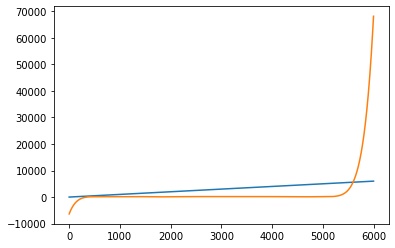

In [42]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(X)

In [45]:
import sklearn.linear_model as skl

lin_reg = skl.LinearRegression().fit(X, y)
print(lin_reg.score(X, y))
print(lin_reg.coef_)
print(lin_reg.intercept_)
t_point = [4,4]
y_pred = lin_reg.predict(np.array([t_point]))
print(y_pred)

1.0
[ 2. 11.]
0.9999999998690328
[53.]


In [46]:
prediction = np.dot(np.array([1, t_point[0], t_point[1]]),
    np.insert(lin_reg.coef_, 0, lin_reg.intercept_).T) * 1.0

print(prediction)
print(y_pred)


52.99999999986907
[53.]
